In [1]:
import sys, os
sys.path.append(os.pardir)
from GANclass import GAN
import numpy as np
from utils.loaders import load_safari, load_cifar
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
gan = GAN(input_dim = (28,28,1),
       discriminator_conv_filters = [64,64,128,128],
       discriminator_conv_kernel_size = [5,5,5,5],
       discriminator_conv_strides = [2,2,2,1],
       discriminator_batch_normal_momentum = None,
       discriminator_activation = 'relu',
       discriminator_dropout_rate = .4,
       discriminator_learning_rate = .0008,
       generator_conv_filters = [128,64,64,1],
       generator_conv_kernel_size = [5,5,5,5],
       generator_conv_strides = [1,1,1,1],
       generator_batch_normal_momentum = .9,
       generator_activation = 'relu',
       generator_dropout_rate = None,
       generator_learning_rate = .0004,
       generator_initial_dense_size = (7,7,64),
       generator_upscale = [2,2,1,1],
       optimizer = 'rmsprop', z_dim = 100)

In [3]:
gan.build_discriminator()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
gan.build_generator()

In [5]:
gan.compile()

In [6]:
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [7]:
(a_train, b_train) = load_safari(DATA_NAME)

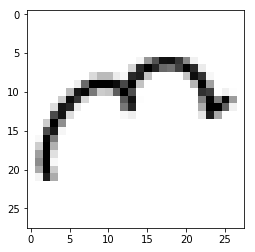

In [8]:
plt.imshow(a_train[2].reshape(28,28), cmap = 'binary')

In [9]:
gan.train(a_train, epochs = 2000, batch_size = 64)

Instructions for updating:
Use tf.cast instead.


/Users/USER/opt/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)       512       
__________

In [11]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_layer_0 ( (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_layer_1 ( (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

In [42]:
noise = np.array(np.random.normal(0.,1.,(1,100)))


In [46]:
a = gan.generator.predict(noise).reshape(1,28,28,1)

TypeError: Invalid dimensions for image data

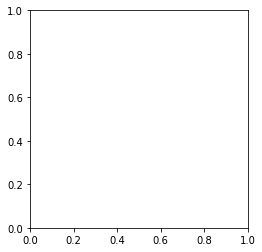

In [47]:
plt.imshow(a, cmap = 'binary')

In [48]:
gan.discriminator.predict(a)

array([[0.]], dtype=float32)

In [2]:
wgan = GAN(input_dim = (32,32,3),
       discriminator_conv_filters = [64,64,128,128],
       discriminator_conv_kernel_size = [5,5,5,5],
       discriminator_conv_strides = [2,2,2,1],
       discriminator_batch_normal_momentum = None,
       discriminator_activation = 'relu',
       discriminator_dropout_rate = .4,
       discriminator_learning_rate = .0008,
       generator_conv_filters = [128,64,64,3],
       generator_conv_kernel_size = [5,5,5,5],
       generator_conv_strides = [1,1,1,1],
       generator_batch_normal_momentum = .9,
       generator_activation = 'relu',
       generator_dropout_rate = None,
       generator_learning_rate = .0004,
       generator_initial_dense_size = (8,8,64),
       generator_upscale = [2,2,1,1],
       optimizer = 'rmsprop', z_dim = 100, WGAN = True)

In [3]:
wgan.build_discriminator()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
wgan.build_generator()

In [5]:
wgan.compile()

In [6]:
# cifar 말 이미지

# run params
SECTION = 'gan'
RUN_ID = '0002'
DATA_NAME = 'horses'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [7]:
if DATA_NAME == 'cars':
    label = 1
elif DATA_NAME == 'horses':
    label = 7
(x_train, y_train) = load_cifar(label, 10)

In [ ]:
d_loss, g_loss = wgan.train(x_train, epochs = 6000, batch_size = 128, clip_threshold = .01, n_critic = 5)

/Users/USER/opt/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
